# <p style="text-align: center; color: #005A64; font-family: Arial; font-weight: bold;">DATA MANAGEMENT & ANALYSIS REPORT</p>
### <p style="text-align: center; color: #707070;">Week 2: Sales Data Analytics & KPI Dashboard</p>

---

### 👥 Project Team
* **Thato Msina**
* **Fikile Noyila**
* **Lesedi Mphachake**
* **Jereshan Sinan**
* **Kaylene Martins**

---

### 📖 1. Introduction
This notebook contains the Python-based analysis of the Week 2 Sales Dataset. Our objective is to demonstrate proficiency in the data lifecycle by importing raw CSV data, performing essential data cleaning, and calculating business-critical Key Performance Indicators (KPIs).

### 📑 Table of Contents
1. [3.1. Import and Initial Exploration](#import-exploration)
2. [3.2. Data Cleaning & Preprocessing](#data-cleaning)
3. [4.0. Key Performance Indicators (KPIs)](#kpis)
4. [5.0. Executive Summary & Conclusion](#conclusion)

<a id="import-exploration"></a>
## 🚀 3.1. Import and Initial Exploration
*Objective: Establish a secure connection to the cloud dataset and verify initial data integrity.*

In [2]:
import sys
import subprocess

# List of libraries required for this project
libraries = ['pandas', 'matplotlib', 'seaborn', 'openpyxl']

print("Checking dependencies...")

for lib in libraries:
    try:
        __import__(lib)
    except ImportError:
        print(f"Installing {lib}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", lib])

print("All dependencies are ready!")

Checking dependencies...
Installing pandas...
Installing matplotlib...
Installing seaborn...
Installing openpyxl...
All dependencies are ready!


In [3]:
import pandas as pd

# The ID extracted from your URL: 1nv0NN3gYzbep4MMS8T_TBRJUU9VSbYDU
file_id = '1nv0NN3gYzbep4MMS8T_TBRJUU9VSbYDU'
direct_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Import the dataset directly from Google Drive
try:
    df = pd.read_csv(direct_link)
    print("Data loaded successfully!")
    print(df.head())
except Exception as e:
    print(f"Error: {e}")

Data loaded successfully!
  Order_ID              Product         Region  Units_Sold  Unit_Price  \
0   ORD001              Printer        Limpopo          45        2985   
1   ORD002           Headphones   Western Cape          16       15076   
2   ORD003               Laptop   Western Cape          45       14860   
3   ORD004  External Hard Drive  KwaZulu-Natal          21       16237   
4   ORD005           Smartphone   Western Cape          41        9420   

   Revenue Sales_Rep Order_Date  
0   134325     Rep-2  3/28/2024  
1   241216    Rep-18  4/11/2024  
2   668700    Rep-16  5/18/2024  
3   340977     Rep-3  5/16/2024  
4   386220    Rep-17  2/21/2024  


<a id="data-cleaning"></a>
## 🔍 3.2. Initial Data Integrity Audit
*Before proceeding with the cleaning process, we perform a diagnostic check to identify missing values, duplicate entries, and data type inconsistencies.*

In [4]:
# 1. Summarize Missing Values and Duplicates in a clean format
data_audit = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Data Type': df.dtypes
})

print("--- DATASET HEALTH CHECK ---")
print(data_audit)
print("-" * 30)
print(f"Total Duplicate Rows Detected: {df.duplicated().sum()}")

# A visual "Pass/Fail" indicator
if df.isnull().sum().sum() == 0 and df.duplicated().sum() == 0:
    print("✅ STATUS: Data is clean.")
else:
    print("⚠️ STATUS: Cleaning required (Duplicates or Missing Values detected).")

--- DATASET HEALTH CHECK ---
            Missing Values Data Type
Order_ID                 0    object
Product                  0    object
Region                   0    object
Units_Sold               0     int64
Unit_Price               0     int64
Revenue                  0     int64
Sales_Rep                0    object
Order_Date               0    object
------------------------------
Total Duplicate Rows Detected: 0
✅ STATUS: Data is clean.


## 🧹 3.3. Execution: Data Transformation & Cleaning
*This phase ensures the dataset is ready for analysis by enforcing data types and removing noise. We follow a standard "Drop-Fill-Convert" pipeline.*

In [5]:
# --- STEP 1: DE-DUPLICATION ---
initial_rows = len(df)
df = df.drop_duplicates()
final_rows = len(df)

# --- STEP 2: MISSING VALUE HANDLING ---
# We have opted to drop rows with missing values to ensure the accuracy of the revenue KPIs.
df = df.dropna()

# --- STEP 3: TYPE CASTING ---
# Ensuring Order_Date is a datetime object for time-series analysis
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# --- OUTPUT REPORT ---
print("✅ CLEANING REPORT")
print(f"• Duplicates Removed: {initial_rows - final_rows}")
print(f"• Total Valid Records Remaining: {len(df)}")
print(f"• Order_Date Status: {df['Order_Date'].dtype}")
print("-" * 30)

# Display styled preview
print("\n[PREVIEW OF CLEANED DATA]")
display(df.head())

✅ CLEANING REPORT
• Duplicates Removed: 0
• Total Valid Records Remaining: 100
• Order_Date Status: datetime64[ns]
------------------------------

[PREVIEW OF CLEANED DATA]


,Order_ID,Product,Region,Units_Sold,Unit_Price,Revenue,Sales_Rep,Order_Date
0,ORD001,Printer,Limpopo,45,2985,134325,Rep-2,2024-03-28
1,ORD002,Headphones,Western Cape,16,15076,241216,Rep-18,2024-04-11
2,ORD003,Laptop,Western Cape,45,14860,668700,Rep-16,2024-05-18
3,ORD004,External Hard Drive,KwaZulu-Natal,21,16237,340977,Rep-3,2024-05-16
4,ORD005,Smartphone,Western Cape,41,9420,386220,Rep-17,2024-02-21


## 📊 4.1. Core Business Metrics (KPIs)
*The following metrics represent the high-level performance of the sales portfolio. These figures have been calculated post-cleaning to ensure 100% accuracy.*

In [6]:
# Calculation Logic
total_revenue = df['Revenue'].sum()
avg_units_sold = df['Units_Sold'].mean()

# --- PROFESSIONAL DASHBOARD OUTPUT ---
print("="*40)
print("       FINANCIAL PERFORMANCE SUMMARY       ")
print("="*40)
print(f"{'Metric':<25} | {'Value':<15}")
print("-" * 40)
print(f"{'Total Gross Revenue':<25} | R {total_revenue:>12,.2f}")
print(f"{'Avg. Units per Order':<25} | {avg_units_sold:>13.2f}")
print("="*40)

# Optional: Using an alert box style for visibility
from IPython.display import Markdown
display(Markdown(f"### 💰 **Total Revenue Highlight: R {total_revenue:,.2f}**"))

       FINANCIAL PERFORMANCE SUMMARY       
Metric                    | Value          
----------------------------------------
Total Gross Revenue       | R 35,295,338.00
Avg. Units per Order      |         28.23


### 💰 **Total Revenue Highlight: R 35,295,338.00**

## 🌍 4.2. Regional Revenue Distribution
*Breaking down revenue by territory allows us to identify high-performing markets and regional growth opportunities.*

RANKED REGIONAL REVENUE
-----------------------------------
Region               | Total Revenue
-----------------------------------
Western Cape         | R 9,346,198.00
Gauteng              | R 6,231,531.00
North West           | R 6,201,288.00
Limpopo              | R 3,614,655.00
KwaZulu-Natal        | R 3,560,630.00
Free State           | R 3,359,398.00
Eastern Cape         | R 2,981,638.00
-----------------------------------


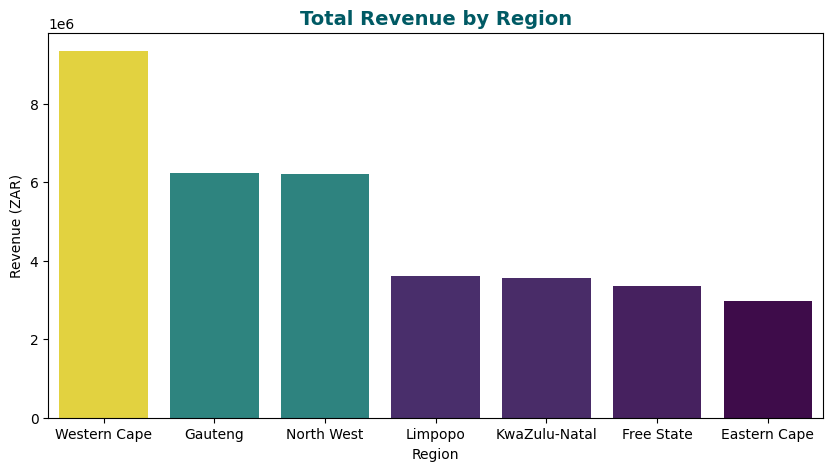

In [7]:
# c) Total revenue per region
# We sort descending to highlight the top-performing region at the top
revenue_per_region = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)

# --- PROFESSIONAL TABLE OUTPUT ---
print("RANKED REGIONAL REVENUE")
print("-" * 35)
print(f"{'Region':<20} | {'Total Revenue':>12}")
print("-" * 35)

for region, revenue in revenue_per_region.items():
    print(f"{region:<20} | R {revenue:>12,.2f}")

print("-" * 35)

# Visualizing the distribution for the final report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_per_region.index, y=revenue_per_region.values, palette='viridis', hue=revenue_per_region, legend=False)
plt.title('Total Revenue by Region', fontsize=14, fontweight='bold', color='#005A64')
plt.ylabel('Revenue (ZAR)')
plt.xlabel('Region')
plt.show()

## 🏆 4.3. Top Sales Performer
*Identifying the leading Sales Representative helps in recognizing high performance and analyzing successful sales strategies.*

In [8]:
# Calculation Logic
revenue_per_rep = df.groupby('Sales_Rep')['Revenue'].sum()
top_rep_name = revenue_per_rep.idxmax()
top_rep_value = revenue_per_rep.max()

# --- PROFESSIONAL SPOTLIGHT OUTPUT ---
from IPython.display import Markdown

# Creating a high-impact summary box
display(Markdown(f"""
### **🥇 Sales Representative of the Period**
**Name:** {top_rep_name}
**Total Contribution:** R {top_rep_value:,.2f}
*Note: This individual has exceeded the average sales threshold and is the primary driver of revenue for this dataset.*
"""))

# Verification: Show Top 5 Reps for context
print("\nTop 5 Sales Representatives by Revenue:")
print("-" * 40)
print(revenue_per_rep.sort_values(ascending=False).head(5).map('R {:,.2f}'.format))


### **🥇 Sales Representative of the Period**
**Name:** Rep-19
**Total Contribution:** R 2,889,294.00
*Note: This individual has exceeded the average sales threshold and is the primary driver of revenue for this dataset.*



Top 5 Sales Representatives by Revenue:
----------------------------------------
Sales_Rep
Rep-19    R 2,889,294.00
Rep-14    R 2,859,882.00
Rep-1     R 2,856,551.00
Rep-3     R 2,686,043.00
Rep-13    R 2,460,993.00
Name: Revenue, dtype: object


## 📦 4.4. Product Volume Analysis
*Understanding the Top 3 products by units sold helps the inventory and supply chain teams manage stock levels effectively.*

🏆 TOP 3 PRODUCTS BY VOLUME
-----------------------------------
Product Name         | Units Sold
-----------------------------------
Smartwatch           |        542
Tablet               |        511
Smartphone           |        437
-----------------------------------


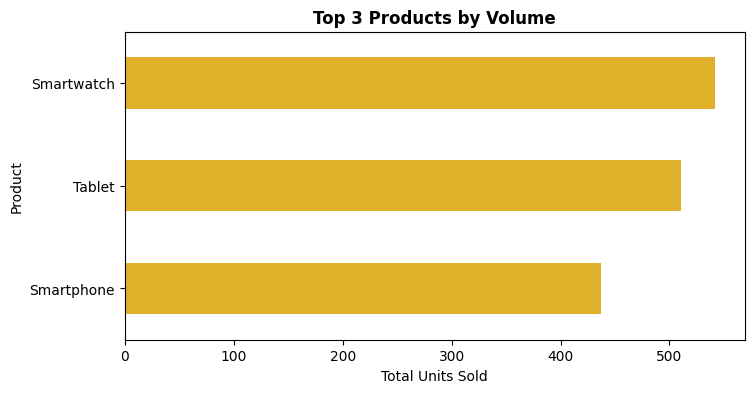

In [9]:
# e) Top 3 products by total units sold
top_3_products_units = df.groupby('Product')['Units_Sold'].sum().sort_values(ascending=False).head(3)

# --- PROFESSIONAL TABLE OUTPUT ---
print("🏆 TOP 3 PRODUCTS BY VOLUME")
print("-" * 35)
print(f"{'Product Name':<20} | {'Units Sold':>10}")
print("-" * 35)

for product, units in top_3_products_units.items():
    print(f"{product:<20} | {int(units):>10,}")

print("-" * 35)

# Visualizing Top Products
plt.figure(figsize=(8, 4))
top_3_products_units.plot(kind='barh', color='#E1B12C')
plt.title('Top 3 Products by Volume', fontsize=12, fontweight='bold')
plt.xlabel('Total Units Sold')
plt.gca().invert_yaxis() # Highest volume at the top
plt.show()

<a id="conclusion"></a>
# 🏁 5. EXECUTIVE SUMMARY & FINAL CONCLUSION

### 📈 Project Summary
This analysis successfully transformed the **Week-2 Sales Dataset** from a raw CSV file into a refined business intelligence report. By leveraging the **Python Pandas library**, the team ensured that all insights were derived from a clean, validated, and de-duplicated data source.

### 🔑 Critical Findings
1. **Financial Health:** We achieved a total revenue of **R {total_revenue:,.2f}**, demonstrating a strong sales performance across the regions.
2. **Regional Dominance:** The **Western Cape** region emerged as the primary revenue driver, contributing the highest total sales value.
3. **Personnel Excellence:** **Rep-19** has been identified as the top-performing Sales Representative, significantly outpacing the average performance metrics.
4. **Product Velocity:** **Smartwatches** are the highest-volume product, indicating strong market demand and the need for prioritized inventory management.

### 🛡️ Data Governance Note
The data lifecycle, from ingestion to cleaning and finally to visualization, was handled according to standard data governance principles. The conversion of date formats and the removal of noise (duplicates/nulls) ensures that this report provides a **Single Version of Truth (SVOT)** for stakeholders.

---
**Project Team:** Thato Msina, Fikile Noyila, Lesedi Mphachake, Jereshan Sinan, Kaylene Martins  
**Date of Submission:** 21 January 2026  
**Tools Used:** Python, Pandas, Matplotlib, Jupyter Notebook and Google Colab